# Intermediate
## Processing numeric data in Python

In the previous section we learned how to use standard Python data structures. They are powerful and allow you to do a great deal, but are not sufficient for high performance scientific computation. Let's consider a common scenario:

You have taken performed an experiment multiple times and stored the results in an array (in this case a list of lists), each inner list representing a separate attempt. You want to take the average of each attempt, and perhaps the average of the entire array.. A simple implementation might be as below.


In [1]:
#The list representing experimental measurements.
#4 runs were done, each with 5 data points.
exp_data = [[5.63, 7.12, 5.0, 5.56, 6.11], [5.22, 6.51, 5.99, 4.73, 5.01]
           ,[4.55, 6.4, 4.81, 2.67, 6.43], [5.22, 5.51, 4.78, 5.21, 1.6]]

def average(exp_data):
    #Initialize container structures
    num_points = 0
    averages = []
    total_average = 0

    #Find each run's average and compute the average of averages.
    total_rolling_sum = 0
    for run in exp_data:
        run_rolling_sum = 0

        for point in run:
            num_points+=1
            run_rolling_sum+=point

        averages.append(run_rolling_sum/len(run))
        total_rolling_sum += run_rolling_sum

    total_average = total_rolling_sum/num_points
    

    print("The averages of each run: ", averages)
    print("The total average: ",  total_average)
    
average(exp_data)

The averages of each run:  [5.8839999999999995, 5.492, 4.9719999999999995, 4.464]
The total average:  5.203


This works fine for an array of 20 elements, but what if we were looping over 20 thousand elements? 200 thousand? The time to complete a full loop scales with the input data size Optimized inbuilt functions like statistics.mean will be faster but still fairly sluggish. Luckily for us there are external libraries to help. 

NumPy is the primary package used for numeric operations in Python. It provides a data class (np.array) and a large collection of accelerated operations on it. 

For reference, let's rewrite the above code using NumPy.

In [2]:
import numpy as np

print("The average of each attempt: ", np.mean(exp_data, axis=1))
print("The total average :", np.mean(exp_data))
      

The average of each attempt:  [5.884 5.492 4.972 4.464]
The total average : 5.202999999999999


If you were to time the two different solutions on a sufficiently large array you would find that NumPy performs around an order of magnitude better. 

The lesson to take away is **DO NOT USE FOR LOOPS** unless you absolutely must. 

Before you start completing the exercises below, take a note of these resources -- they are very useful!

* [NumPy user guide](https://docs.scipy.org/doc/numpy/user/index.html#user)
* [NumPy API reference](https://docs.scipy.org/doc/numpy/reference/)
* [Introduction to Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
* [Matplotlib command summary](https://matplotlib.org/api/pyplot_summary.html)

## Manipulating NumPy arrays

NumPy uses **NumPy arrays** as its base building block. All np.arrays are static, meaning their size cannot be changed after creation. Array dimensions are specified as int tuples (or a single int if you're creating a 1D vector). All numbers in the array must be **of the same type**.

Arrays can be created in several ways: from a Python list (and nD arrays from nested lists), as a "blank" matrix of zeros or ones or random data, by copying existing arrays, loaded from disk or from certain special functions.

**You can always make a copy of an array using np.array() on an existing array** (e.g. `x = np.array(y)` makes a new **copy** of y). `np.array()` will also convert any iterable object (lists, tuples) into an array if it can. Note that a few operations will *change arrays in place*, and most will *return new copies*.

Some nomenclature to keep in mind:
1D arrays are often called vectors.
2D arrays are often called matrices.
3 or higher dimensional arrays are often called tensors.

In [3]:
#A couple examples for making arays.
zero_array = np.zeros((6,7))
exp_array = np.array(exp_data)

#Check out out how an array looks
print(zero_array)

#You can check the size and data type of an array by its attributes.
print(zero_array.shape, zero_array.dtype)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
(6, 7) float64


# 1. Create some arrays

Practice creating arrays. Use inbuilt NumPy functions to create the following:

* A 4x4 matrix with every element being equal to pi.
* A 1x2x5 tensor of all ones.
* A 1D array with 10 elements, from 0-18 (inclusive), stepping by 2. 
* A 300 element long array filled with normally distributed random numbers.

If you're not sure how to do it, check the documentation online. 


In [4]:
#YOUR CODE HERE

# 2. Indexing and slicing

Scientists at the Zoology Department, The University of Adelaide have studied the best conditions to keep snails alive. They have recorded a dataset of observations of snail mortality under controlled conditions. This data set is in the file `data/snails.txt`.

#### An excerpt from the data set description
>Groups of 20 snails were held for periods of 1, 2, 3 or 4 weeks in carefully
controlled conditions of temperature and relative humidity. There were two
species of snail, 0 and 1. At the end of the exposure time the snails
were tested to see if they had survived. 

>The data are unusual in that in most cases fatalities during the experiment
were fairly small. [lucky snails!]

### The task
The data is a 2D array, and has six columns, with these definitions:

     species(binary) exposure(weeks) humidity(%) temperature(deg. C) n_deaths n_snails
    
Each row represents one set of observations (i.e. one group of snails). You are to compute some basic properties of this data. Use NumPy operations to do the computations.

A. **Loading arrays** 
* Load this data as a NumPy array called `snails`. Note: use np,loadtxt to do this.
* Print it out. Use this format to print out the results:
    
      print("snails\n", snails)

In [5]:
#YOUR CODE HERE

B. **Indexing and slicing**

A reminder: NumPy arrays support the same sort of slicing and indexing operations that Python lists do:

* Use square brackets to indicate an index or a slice. 
* Indexing starts from 0 as elsewhere in Python.
* Separate the indexes for different axes with commas. For example, array[

Compute the following results using the above techniques, storing the results in the variable specified and printing them out. Use the same printing format as A.

* `hum_last` the humidity in the last entry in the table.
* `temp_last` the temperature in the first entry in the table. 
* `weeks` the whole column of "weeks exposure".
* `row_third` the third row of observations. (remember 0 indexing)


In [6]:
#YOUR CODE HERE

C. **Aggregate functions** 
Compute the following results, storing the results in the variable specified and printing them out:

* `total_deaths` total number of snails that died
* `total_still_alive` total number of snails that survived the whole study
* `mean_temp` mean temperature in the whole study
* `max_humidity` highest humidity in the study
* `average_death_rate` mean of the ratio of snail deaths to snails in the study
* `snail_weeks` the total amount of snail effort that went into this study (number of snails times number of weeks)

Check the documentation for appropriate functions. Each computation should be **a single line of code**.

In [7]:
#YOUR CODE HERE

D. **Boolean indexing**
In addition to normal list-style indexing, NumPy arrays support boolean indexing. Instead of using numbers, you can index using logical expressions. For example, `vector[x>5]` will pick out all the vector elements higher than 5. For further info consult the documentation.

Compute the following results, storing the results in the variable specified and printing them out:

* `species_0` and `species_1`: split the dataset into two arrays, one with the entries for species 0 and one with the entries for species 1.

* `weakest_snail` the snail species (0 or 1) that had the highest average death rate

In [8]:
#YOUR CODE HERE

E. **Arithmetic and ordering**
Compute the following results, storing the results in the variable specified and printing them out:

* `deg_f` each temperature in the study, but in degrees Fahrenheit. Use the knowledge that `0C = 32F, 100C = 212F`
* `mean_cols` the mean of all the columns, as a 1D vector
* `death_rate` the death rates, in sorted order, smallest first
* `exposure_death_order` the exposure durations (in weeks), but in sorted in the order of death rates, smallest death rate first.

* `best_temp`, `best_hum` the best temperature and humidity to keep a snail for four weeks without it dying. *Look only at the four week exposures, ignoring snails kept for less than this time.* 

Hint: For exposure_death_order, look at np.argsort.

In [9]:
#YOUR CODE HERE

# Visualizing data with Matplotlib

Matplotlib is one of the main visualization packages you will be working with in Python. We will first go through a short tutorial to help you get used to the interface.

In this example, the plotting commands are split up among notebook cells so that each step can be explained. In your code, just have all of the commands in one cell, to avoid having to scroll up and down as you make changes.

## Some data
This data is synthetic. It's a simple trigonometric function; the details don't particularly matter.

In [10]:
#Import Matplotlib
# make the plots look good inline
%matplotlib notebook
# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt

In [11]:
# a simple function, returns pulses with a shape determined by k
def pulse(x, k):
    return np.cos(x) * np.exp(np.cos(x) * k - k)

## generate an x value to be transformed
x = np.linspace(-3*np.pi, 3 * np.pi, 500)

## Figures
To begin any plotting we must create a **figure**, which is a "blank canvas" onto which we can add visualisations. **Important: the visualisation will always appear in the output of whichever cell has the `plt.figure()` call.** As a consequence, all of the commands below will affect in the output of the cell below.

When you go through the various steps below, scroll back up to this cell to see their effect. Note that usually all plotting commands go in *one* cell, so we don't end up scrolling about.

<IPython.core.display.Javascript object>


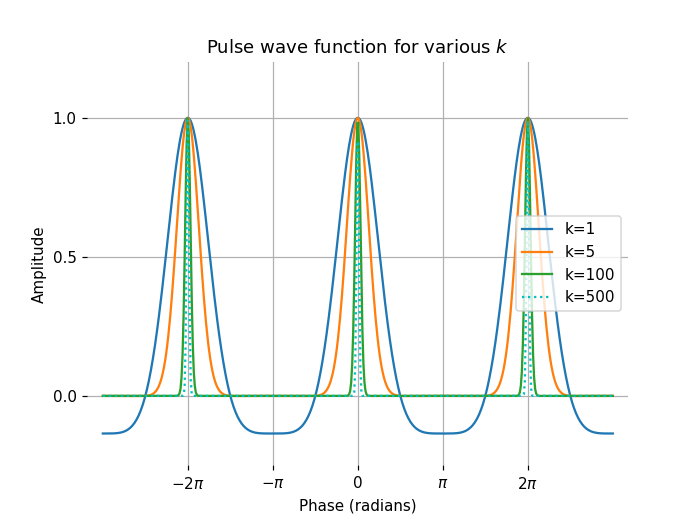

In [12]:
fig = plt.figure()  # create a new figure. It will be blank.

## If you want a different size of figure, you can use:
# fig = plt.figure(figsize=(3,3)) # quite small
# the default size set here is good for this exercise

## Axes
To draw anything, we must define **axes**. Each axes is a facet of a plot. It has a coordinate system which can be used to draw data. 

The call to create a new axis is formatted `fig.add_subplot(rows, columns, index)` which will create a subplot in a matrix of axes indexed by the index. The index increases column-wise, then row-wise, and starts from *1* (not 0!)

For example, we could create a 3x2 array of plots, and select the middle-left plot
using `plt.add_subplot(3, 2, 3)`

        --------
       | 1 | 2 |
       | 3 | 4 |
       | 5 | 6 |
       ---------

Most of the time, though, we just want one axes that fills the figure and `fig.add_subplot(1,1,1)` does that. The object it returns is what we use for all subsequent plotting.

In [13]:
ax = fig.add_subplot(1, 1, 1)  
# create a new subplot, returning a set of axes
# look above ^ ^ at the figure. You should see the axes appear

We make a line plot of `x` against `f(x, k)` for a few fixed values of `k`.
Each subsequent plot will be a new color, and all of the plots will be overlaid on the axes

`ax.plot(x,y)` is the basic line plotting command. It is called on an axes object.

Note that the `label=` gives a label that the `legend` command will use to label the graph afterwards. Always label plots if you want readers to be able to distinguish them.

In [14]:
ax.cla()  # cla means to CLear Axes. 
# it does nothing the first time we run it, but it will clear the plot and redraw if
# you run this cell multiple times. Try commenting it out and running this cell twice!


ax.plot(x, pulse(x,1), label='k=1')
ax.plot(x, pulse(x, 5), label='k=5')
ax.plot(x, pulse(x, 100), label='k=100')

# you can adjust the styling of the plot manually: 
#   here the color is black ("k") 
#   and the linestyle is dotted (":")
ax.plot(x, pulse(x, 500), label='k=500', color='C', linestyle=':')

## note that there are several built-in colors called
# C0, C1, C2, C3, C4, C5, and C6
# they will generally look good
# try changing the 'k' above to 'C6'

Now we can add **labels** to the plot. There should always be a label for the x-axis, y-axis and a title for the axes. We should also have a **legend** if multiple layers are used. `ax.legend()` will draw one. It can be configured in many ways, but the defaults are fine here.

In [15]:
# label the plot 
ax.set_xlabel("Phase (radians)")  # x-axis label
ax.set_ylabel("Amplitude")        # y-axis label
ax.set_title("Pulse wave function for various $k$")  # title of plot (appears above plot)

# create a legend (key) for the plot, using the labels specified
# in the ax.plot() calls, like ax.plot(x,y, label="xy")
ax.legend()

By default, the scaling of the axis will be adjusted to fit the data. This isn't always a good idea, so you can adjust it manually. The axis limits are set by `ax.set_xlim(min,max)` and `ax.set_ylim(min,max)` and these adjust the scaling of the axes. This configures the **coords** used to draw data.

You can try changing these to see different parts of the curve.

**Note that you don't need to call the plot commands again when you update the axis limits.**

### Tweaking

We can tweak the plot in many ways. Try some of the below.


In [16]:
## set the limits of the plot
# (if this is omitted, sensible autoscaling will be applied)
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(-0.25, 1.2)

(-0.25, 1.2)

In [17]:
# grid 
ax.grid(True) # or False to turn it off

In [18]:
# frame
ax.set_frame_on(False) # or True to turn it back on

In [19]:
ax.set_xticks([-10, -5, 0, 5, 10]) # Tick positions on the x axis
ax.set_yticks([0,0.5,1.0]) # and on the y-axis

In [20]:
# this is a fancier tick adjustment
# Tick positions on the x axis
ax.set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]) 

# we can relabel the ticks using the same order. 
# LaTeX formulae work if inside $ symbols
ax.set_xticklabels(["$-2\pi$", "$-\pi$", "0", "$\pi$", "$2\pi$"])

[Text(0, 0, '$-2\\pi$'),
 Text(0, 0, '$-\\pi$'),
 Text(0, 0, '0'),
 Text(0, 0, '$\\pi$'),
 Text(0, 0, '$2\\pi$')]

The standard colours in matplotlib are shown below (you can also specify custom colours)

<IPython.core.display.Javascript object>


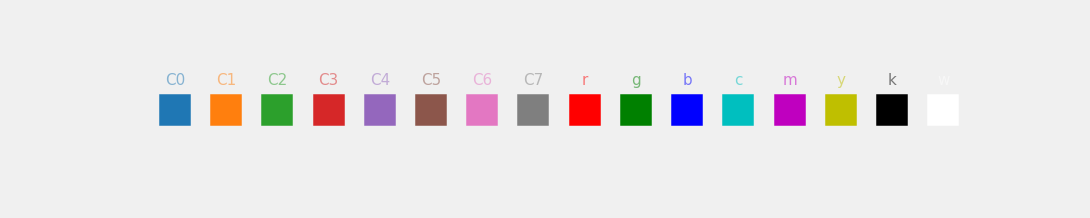

(-0.75, 15.75, 0.0, 1.0)

In [21]:
## Standard colours
fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(1,1,1)
fig.set_facecolor("#f0f0f0")  # can always use Hex colors, or floating point arrays
for i,col in enumerate(["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", 
                        "r", "g", "b", "c", "m", "y", "k", "w"]):
    
    # plot, and add some simple text
    ax.plot(i, 0.5, c=col, marker='s', markersize=20)
    # alpha sets opacity of rendering
    ax.text(i, 0.5+0.15, col, ha='center', color=col, alpha=0.5)
    
ax.set_ylim(0,1) # set axis limits    
ax.axis("off") # remove axis; there are no units to show

# 1. Simple plots 

Let's try out Mastplotlib and take a look at some of the mathematical functions in NumPy.

* Plot sine, cosine, and tangent functions for a chosen range of values.
* Plot a normal distribution. Play around with the stdev parameter and see how it changes.

In [22]:
#YOUR CODE HERE

For these exercises, you need to plot graphs showing the data which is provided to you. 
    
* choose the right kind of plot (line, scatter, bar, histogram). There may be more than one right choice.
* plot the data correctly
* make sure all the details are sensible (axes, labelling, etc.)
* **write a short caption for the data in the cell provided.**

You will get the name of the file with the data, along with a comment that explains the format of the data. You can use `np.loadtxt()` to load the datasets.

A)
* Data file: `data/cherry_trees.txt`
* Description: Height and volume of black cherry trees  measured in an orchard.
* Columns:
  
       Height (ft)  Volume (ft^3)

Note: plot your graph in **metric units**. 1 ft = 0.3048m

In [28]:
#YOUR CODE HERE

B)
* Data file: `data/air_passengers.txt`
* Description: The number of international air passengers, each month, 1949 to 1960.
* Columns:

      year   passenger_count

In [24]:
#YOUR CODE HERE

C) 
* Data file: `data/rivers.txt`
* Description: Length of major rivers in the United States (miles)
* Columns:
   
       river_length

In [25]:
#YOUR CODE HERE

# 2. Layered and faceted plots 

A **layered** plot has more than one set of markers overlaid on the same coordinate system. A **faceted** plot uses multiple coordinate systems to show different views of the data.

For the dataset, appropriately use layering, faceting and reduction operations to show the dataset. 

* Data file `data/cake.txt`
* Description: 
>Data on the breakage angle of chocolate cakes made with three different
recipes and baked at six different temperatures. The angle of breakage is affected by the recipe and temperature. The experiment was repeated 15 times (replicates).

* Columns:

        replicate(1-15)    recipe(0-2)    temp(deg F)    angle(deg)

Use this model:
* Facet `recipes`
* Layer `replicates`

* Colour each replicate identically, and use lowered opacity.

* As well as the layered replicates, clearly show the mean and standard deviation of the breakage angle in each facet as a line and a ribbon.

* Convert Fahrenheit to Celsius before plotting. 

* `plt.tight_layout()` will fix layout of facets. Set a super-title across all facets using `fig.suptitle()`. 

* You will need one or more `for` loops (probably) to solve this problem.
* Use Boolean arrays to perform `group by` like operations.

In [26]:
#YOUR CODE HERE

* Data file: `data/insects.txt`
* Description: The counts of insects on each leaf of a plant in agricultural experimental units treated with different insecticides.
* Columns:

            insect_count spray_id (0-5)


* Plot the data, on three separate figures, using:
    * A simple bar chart of the mean insect counts (grouped by spray).
    * A barchart showing the mean counts (grouped), and half a standard deviation above and below the mean. Find a way to show this interval (hint: look at the [`plt.bar` documentation](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html)). The standard deviation of an array can be computed by `np.std(x, axis)`, just like `np.mean()`.
    * A Box plot of the insect counts.

* Mark the ticks on the x axis using the names of the sprays.

        0 = Insecticator
        1 = Placebo
        2 = BuzzNoMore
        3 = Aprotex
        4 = DieOff

In [ ]:
#YOUR CODE HERE

# References 

Huge thanks to Dr John H. Williamson for allowing us to use his teaching materials in this workshop, including most of the practical examples.